In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from glob import glob
import random
from tqdm.auto import tqdm

/home/daryna/anaconda3/envs/miaod/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
os.chdir('../')

In [71]:
sns.set(style='whitegrid', palette='Set1', font_scale=1.4)

In [72]:
plt.rc('font', size=16, family="Times New Roman")   
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('xtick', labelsize=14, )    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=14, )

In [5]:
np.random.seed(42)
random.seed(42)

In [6]:
from tools.analyze_logs import load_json_logs

In [7]:
!pwd

/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD


In [8]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 'configs',
 'data',
 'docker',
 'docs',
 'epoch_based_runner.py',
 'figures',
 'foo.png',
 'for_coco',
 'images',
 'LICENSE',
 'log_nohup',
 'mmdet',
 'mmdet.egg-info',
 'notebooks',
 'pytest.ini',
 'README.md',
 'README_cn.md',
 'requirements',
 'script.sh',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'work_dirs']

# Read logs

In [9]:
WORK_DIR = '/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/'
LOG_TS = '20220422_201426'
JSON_LOG = os.path.join(WORK_DIR, LOG_TS, LOG_TS + '.log.json')

In [10]:
for log_path in glob(WORK_DIR+'*/', recursive = True):
    if 'cycle6' in os.listdir(log_path):
        print(log_path)

/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/20220416_152637/
/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/20220426_164853/
/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/20220429_183416/
/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/20220507_223026/
/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/work_dirs/MI-AOD/20220509_225504/


In [11]:
researches_mapping = {
    '20220429_183416': 'Original',
    '20220426_164853': 'KL Divergence',
    '20220416_152637': 'Binary Cross Entropy',
    '20220507_223026': 'Focal Loss',
    '20220509_225504': 'JS Divergence'
    
}

In [12]:
researches_mapping.values()

dict_values(['Original', 'KL Divergence', 'Binary Cross Entropy', 'Focal Loss', 'JS Divergence'])

In [13]:
def read_json_logs(json_log_path):
    logs = []
    train_logs = []
    val_logs = []
    with open(json_log_path, 'r') as log_file:
        for line in log_file:
            log = json.loads(line.strip())
            log['log_name'] = json_log_path.split('work_dirs/MI-AOD/')[-1].split('/')[0]
            logs.append(log)
            if 'mode' in log.keys():
                if log['mode'] == 'train':
                    train_logs.append(log)
                elif log['mode'] == 'val':
                    val_logs.append(log)
    return logs, train_logs, val_logs

## Different distance results

## L1 loss (used in paper)

In [14]:
Image(url='https://miro.medium.com/max/630/1*OVlFLnMwHDx08PHzqlBDag.gif', height=100, width=300)

## Binary Cross-entropy / Log Loss

In [15]:
Image(url= "http://androidkt.com/wp-content/uploads/2021/05/Selection_099-1024x200.png", height=100, width=700)

## Kullback–Leibler (KL) divergence

In [16]:
Image(url= "https://miro.medium.com/max/566/1*pqnS3f2aWcKSFqfXxx75JQ.png", height=100, width=400)

In [17]:
logs = []
train_logs = []
val_logs = []
for log_name in researches_mapping.keys():
    json_log_path = os.path.join(WORK_DIR, log_name, log_name + '.log.json')
    l, t_l, v_l = read_json_logs(json_log_path)
    logs.extend(l)
    train_logs.extend(t_l)
    val_logs.extend(v_l)
df_train_logs = pd.DataFrame(train_logs)
df_train_logs['log_name'] = df_train_logs['log_name'].map(researches_mapping)
df_val_logs = pd.DataFrame(val_logs)
df_val_logs['log_name'] = df_val_logs['log_name'].map(researches_mapping)

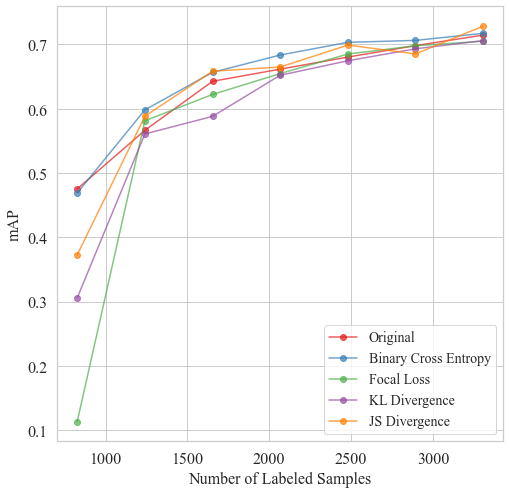

In [18]:
metrics_to_show = ['Original', 'Binary Cross Entropy', 'Focal Loss', 'KL Divergence', 'JS Divergence']
df_val_logs_p = df_val_logs.pivot(index='iter', values='mAP', columns='log_name')
df_val_logs_p.columns.name = None
df_val_logs_p[metrics_to_show].plot(
    ylabel='mAP', xlabel='Number of Labeled Samples', figsize=(8, 8), alpha=0.7, style='-o', fontsize=16);
plt.ylabel('mAP',fontdict={'fontsize':16})
plt.xlabel('Number of Labeled Samples',fontdict={'fontsize':16});

In [36]:
df_val_logs_p[metrics_to_show]

,Original,Binary Cross Entropy,Focal Loss,KL Divergence,JS Divergence
iter,,,,,
827,0.47525,0.46891,0.11321,0.30570,0.37259
1240,0.56642,0.59817,0.58129,0.56077,0.58834
1653,0.64269,0.65664,0.62222,0.58810,0.65840
2066,0.66163,0.68357,0.65470,0.65210,0.66493
2479,0.68039,0.70334,0.68516,0.67465,0.69908
2892,0.69820,0.70636,0.69802,0.69326,0.68530
3305,0.71463,0.71734,0.70509,0.70604,0.72848


In [19]:
import matplotlib.ticker as mtick

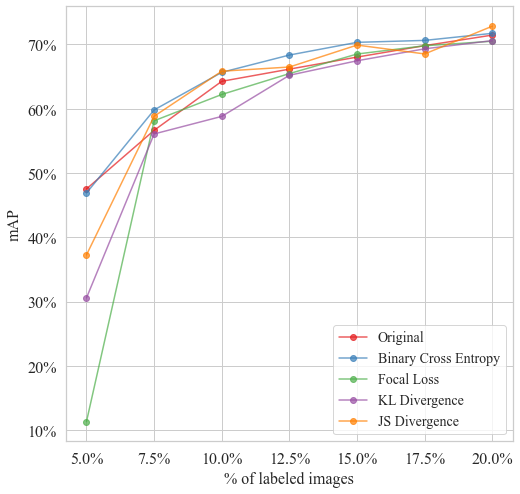

In [20]:
n_train_samples = (5011 + 11540)
df_val_logs['pct_labeled_samples'] = np.round(df_val_logs['iter'] / n_train_samples, 3)

df_val_logs_p_pct = df_val_logs.pivot(index='pct_labeled_samples', values='mAP', columns='log_name')
df_val_logs_p_pct.columns.name = None
ax = df_val_logs_p_pct[metrics_to_show].plot(
    ylabel='mAP', xlabel='Number of Labeled Samples', figsize=(8, 8), alpha=0.7, style='-o', fontsize=16);
ax.set_ylabel('mAP',fontdict={'fontsize':16})
ax.set_xlabel('% of labeled images',fontdict={'fontsize':16});
plt.xticks(df_val_logs_p_pct.index);
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
plt.savefig('images/labeled_images_pct_to_map.jpg', bbox_inches='tight', dpi=200)

In [37]:
df_val_logs_p_pct[metrics_to_show]

,Original,Binary Cross Entropy,Focal Loss,KL Divergence,JS Divergence
pct_labeled_samples,,,,,
0.050,0.47525,0.46891,0.11321,0.30570,0.37259
0.075,0.56642,0.59817,0.58129,0.56077,0.58834
0.100,0.64269,0.65664,0.62222,0.58810,0.65840
0.125,0.66163,0.68357,0.65470,0.65210,0.66493
0.150,0.68039,0.70334,0.68516,0.67465,0.69908
0.175,0.69820,0.70636,0.69802,0.69326,0.68530
0.200,0.71463,0.71734,0.70509,0.70604,0.72848


# Check model for filtering blurred images

In [21]:
import cv2
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from mmdet.apis.inference import *

In [22]:
DATA_DIR = '/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/data/VOCdevkit/'

## Read model and prepare train/test sets images split

In [23]:
model = init_detector(
        './configs/MIAOD.py', checkpoint=os.path.join(WORK_DIR, '20220429_183416/epoch_3.pth'), device='cuda:0')

In [24]:
train_images_names = dict()
test_images_names = dict()

datasets_names = ['VOC2007', 'VOC2012']

for dataset_name in datasets_names:
    train_list_path = os.path.join(DATA_DIR, f'{dataset_name}/ImageSets/Main/trainval.txt')
    
    with open(train_list_path, 'r') as f:
        train_images_names[dataset_name] = [line.strip() for line in f]
        
    if dataset_name == 'VOC2012': # no test set for VOC2012
        continue
    test_list_path = os.path.join(DATA_DIR, f'{dataset_name}/ImageSets/Main/test.txt')
    with open(test_list_path, 'r') as f:
        test_images_names[dataset_name] = [line.strip() for line in f]
        
df_train_images = pd.concat({k: pd.Series(v) for k, v in train_images_names.items()}).reset_index()
df_test_images = pd.concat({k: pd.Series(v) for k, v in test_images_names.items()}).reset_index()
df_train_images['is_test'] = 0
df_test_images['is_test'] = 1

df_images = pd.concat([df_train_images, df_test_images])
df_images = df_images.rename(columns={'level_0': 'dataset', 0: 'image_name'})
df_images = df_images.drop('level_1', axis=1)

In [25]:
df_images_all = df_images.copy()
df_images = df_images[~((df_images['dataset'] == 'VOC2007') & (df_images['is_test'] == 0))]
df_images = df_images.reset_index(drop=True)

In [26]:
df_images.sample(20)

,dataset,image_name,is_test
3015,VOC2012,2008_006088,0
9912,VOC2012,2010_005721,0
11766,VOC2007,000444,1
6973,VOC2012,2009_005153,0
15394,VOC2007,007780,1
13999,VOC2007,004922,1
700,VOC2012,2008_001429,0
13190,VOC2007,003324,1
14354,VOC2007,005651,1
16412,VOC2007,009804,1


## Images blurring
Blur images in train and test sets. 
50% of the images are blurred with Gaussian blur with different factor (inverse of strength). 50% of the images are left as they are.

In [27]:
def apply_blur(img, factor=3.):
    (h, w) = img.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)
    # ensure the width of the kernel is odd
    if kW % 2 == 0:
        kW -= 1
    # ensure the height of the kernel is odd
    if kH % 2 == 0:
        kH -= 1
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    # out = np.where(mask, blurred_img, img)
    # return out
    return blurred_img

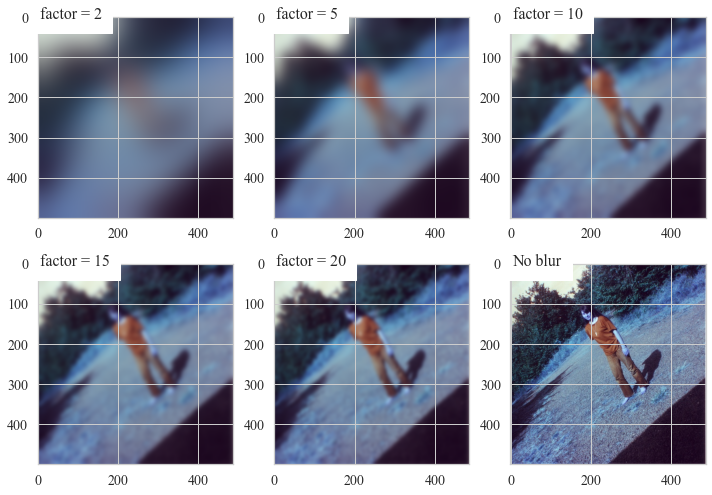

In [60]:
factors = [2, 5, 10, 15, 20] + [None]

fig = plt.figure(figsize=(10, 7))    
nrows, ncols = 2, int(len(factors) // 2)
for i, factor in enumerate(factors):
    results = {'img': os.path.join(DATA_DIR, 'VOC2012/JPEGImages/2007_000027.jpg')}

    img_loader = LoadImage()
    img = img_loader(results)
    if factor is not None:
        img['img'] = apply_blur(img['img'], factor)
    # res = inference_detector(model, img['img'])
    # uncertainty = res[1].cpu().numpy().item()
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.imshow(img['img'])
    ax.text(5, 5, f'factor = {factor}' if factor else "No blur", bbox={'facecolor': 'white', 'pad': 10}, fontdict={'fontsize':16})
plt.tight_layout()
plt.show()
fig.savefig('images/blur_factor_examples.jpg', bbox_inches='tight', dpi=200)
plt.close()



In [30]:
df_images['is_blurred'] = random.choices([0, 1], weights=(1, 1), k=df_images.shape[0])
df_images['factor'] = np.nan
df_images.loc[df_images['is_blurred'] == 1, 'factor'] = random.choices([2, 5, 10, 15, 20], k=sum(df_images['is_blurred'] == 1))

df_images.groupby(['is_test', 'is_blurred', 'factor'], dropna=False).size()

is_test  is_blurred  factor
0        0           NaN       5780
         1           2.0       1181
                     5.0       1097
                     10.0      1169
                     15.0      1128
                     20.0      1185
1        0           NaN       2432
         1           2.0        537
                     5.0        523
                     10.0       493
                     15.0       507
                     20.0       460
dtype: int64

In [31]:
df_images.groupby('is_test').size()

is_test
0    11540
1     4952
dtype: int64

## Calculate uncertainty for blurred/clear images

In [32]:
df_images['uncertainty'] = np.nan
for i, row in tqdm(df_images.iterrows(), total=df_images.shape[0]):
    results = {'img': os.path.join(DATA_DIR, f'{row["dataset"]}/JPEGImages/{row["image_name"]}.jpg')}
    img_loader = LoadImage()
    img = img_loader(results)
    if row['is_blurred']:
        img['img'] = apply_blur(img['img'], row['factor'])
    res = inference_detector(model, img['img'])
    uncertainty = res[1].cpu().numpy().item()
    df_images.loc[i, 'uncertainty'] = uncertainty

  0%|                                                                                               | 0/16492 [00:00<?, ?it/s]/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD/mmdet/core/post_processing/bbox_nms.py:52: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  labels = valid_mask.nonzero()[:, 1]
100%|███████████████████████████████████████████████████████████████████████████████████| 16492/16492 [48:44<00:00,  5.64it/s]


In [33]:
train_mask = (df_images['is_test'] == 0)
test_mask = (df_images['is_test'] == 1)
blur_mask = df_images['is_blurred'] == 1

In [35]:
!pwd

/media/daryna/Новый том/university/university_mnt/university/diploma/MI-AOD


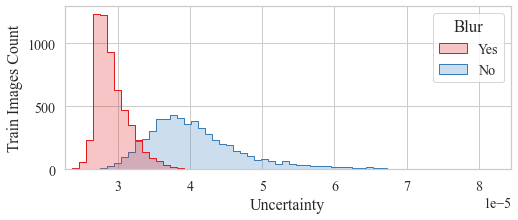

In [84]:
plt.figure(figsize=(8, 3))


sns.histplot(
    df_images.rename(
        columns={'is_blurred': 'Blur', 'uncertainty':'Uncertainty'}
    ).replace(
        {'Blur': {1: 'Yes', 0:'No'}}
    )[train_mask],

    x="Uncertainty", hue="Blur",  element="step")
plt.xlim(df_images['uncertainty'].min(),df_images['uncertainty'][test_mask].max())
plt.ylabel('Train Images Count',fontdict={'fontsize':16})
plt.xlabel('Uncertainty',fontdict={'fontsize':16});
plt.savefig('images/hist_uncertainty_train.jpg', bbox_inches='tight', dpi=200)

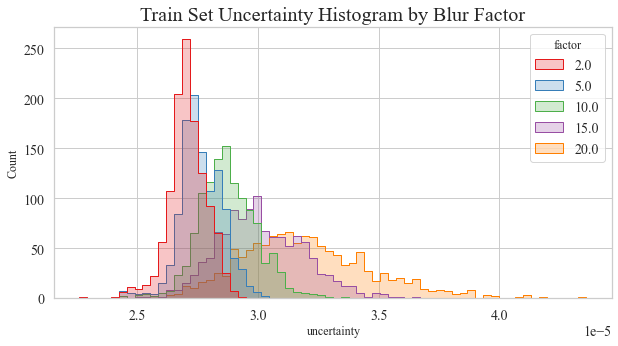

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df_images[train_mask & blur_mask], x="uncertainty", hue="factor",  element="step", palette='Set1')
plt.title('Train Set Uncertainty Histogram by Blur Factor');

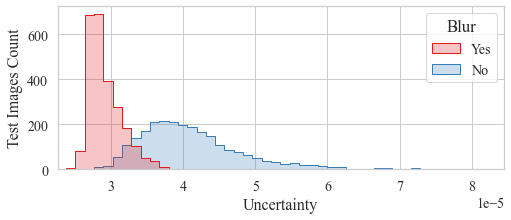

In [85]:
plt.figure(figsize=(8, 3))

sns.histplot(
    df_images.rename(
        columns={'is_blurred': 'Blur', 'uncertainty':'Uncertainty'}
    ).replace(
        {'Blur': {1: 'Yes', 0:'No'}}
    )[test_mask], 
    x="Uncertainty", hue="Blur",  element="step")
plt.xlim(df_images['uncertainty'].min(),df_images['uncertainty'][test_mask].max())
plt.ylabel('Test Images Count',fontdict={'fontsize':16})
plt.xlabel('Uncertainty',fontdict={'fontsize':16});
plt.savefig('images/hist_uncertainty_test.jpg', bbox_inches='tight', dpi=200)

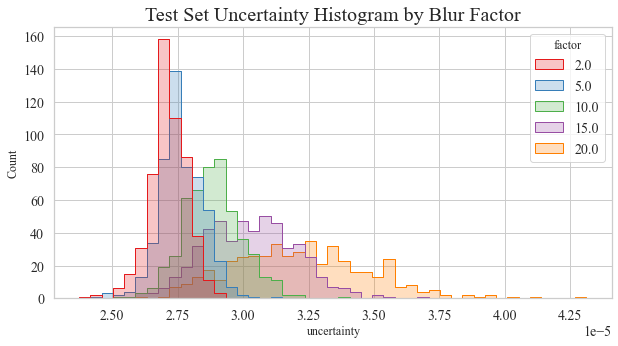

In [64]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df_images[test_mask & blur_mask], x="uncertainty", hue="factor",  element="step", palette='Set1')
plt.title('Test Set Uncertainty Histogram by Blur Factor');

## Analyze the results
Find best uncertainty threshold based on the train set results using precision-recall curve. Analyze the results for both train and test.

Accuracy 0.9207105719237435
Precision 0.9091673675357443
Recall 0.9351211072664359
F1-score 0.921961620469083


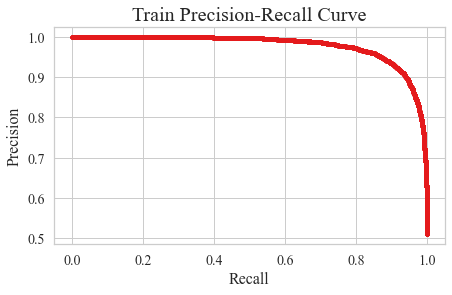

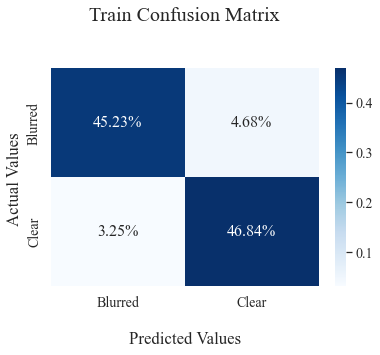

In [81]:
precision, recall, thresholds = precision_recall_curve(
    (df_images[train_mask ]['is_blurred'] == False).astype(int), 
    df_images[train_mask]['uncertainty'])

dist_from_11 = [(1 - p)**2 + (1-q)**2 for p, q in zip(precision, recall)]
best_threshold = thresholds[np.array(dist_from_11).argmin()]

y_true = (df_images[train_mask]['is_blurred']==0).astype(int)
y_pred = (df_images[train_mask]['uncertainty'] > best_threshold).astype(int)

print('Accuracy', accuracy_score(y_true, y_pred))
print('Precision', precision_score(y_true, y_pred))
print('Recall', recall_score(y_true, y_pred))
print('F1-score', f1_score(y_true, y_pred))

plt.figure(figsize=(7, 4))
plt.plot(recall, precision, marker='.')

# baseline = sum(train_mask & (~blur_mask)) / sum(train_mask)
plt.title('Train Precision-Recall Curve')
plt.ylabel('Precision', fontdict={'fontsize':16})
plt.xlabel('Recall', fontdict={'fontsize':16});
plt.savefig('images/precision-recall_curve_train.jpg', bbox_inches='tight', dpi=200)
plt.show()
plt.close()

train_conf_matrix = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(train_conf_matrix/ np.sum(train_conf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Train Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Blurred','Clear'])
ax.yaxis.set_ticklabels(['Blurred','Clear'])
ax.figure.savefig('images/confusion_matrix_train.jpg', bbox_inches='tight', dpi=200)

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
best_threshold

3.251436646678485e-05

Accuracy 0.9143780290791599
Precision 0.8987291501191422
Recall 0.9305098684210527
F1-score 0.9143434343434343


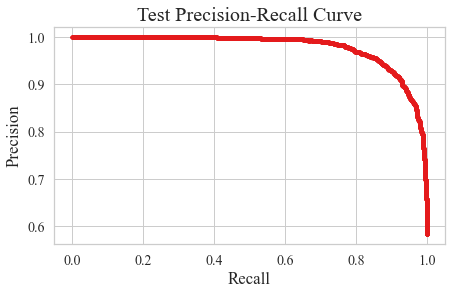

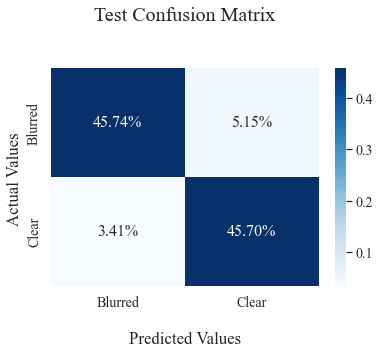

In [83]:
precision, recall, thresholds = precision_recall_curve((df_images[test_mask]['is_blurred'] == False).astype(int), df_images[test_mask]['uncertainty'])

plt.figure(figsize=(7, 4))
plt.plot(recall, precision, marker='.')
y_true = (df_images[test_mask]['is_blurred']==0).astype(int)
y_pred = (df_images[test_mask]['uncertainty'] > best_threshold).astype(int)
print('Accuracy', accuracy_score(y_true, y_pred))
print('Precision', precision_score(y_true, y_pred))
print('Recall', recall_score(y_true, y_pred))
print('F1-score', f1_score(y_true, y_pred))
baseline = sum(test_mask & (~blur_mask)) / sum(test_mask)
plt.title('Test Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall');
plt.savefig('images/precision-recall_curve_test.jpg', bbox_inches='tight', dpi=200)
plt.show()
plt.close()

test_conf_matrix = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(test_conf_matrix/ np.sum(test_conf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Test Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Blurred','Clear'])
ax.yaxis.set_ticklabels(['Blurred','Clear'])
ax.figure.savefig('images/confusion_matrix_test.jpg', bbox_inches='tight', dpi=200)

## Display the visualization of the Confusion Matrix.
plt.show()

# Some examples of correctly/wrongly classified images

In [39]:
df_images['pred_is_blurred'] = (df_images['uncertainty'] <= best_threshold).astype(int)

### Incorrectly classified images

There are a lot of wrongly classified images among blurred images with high factor (low strength of blur) - that's probably because the quality of the picture is still good enough to recognize something.

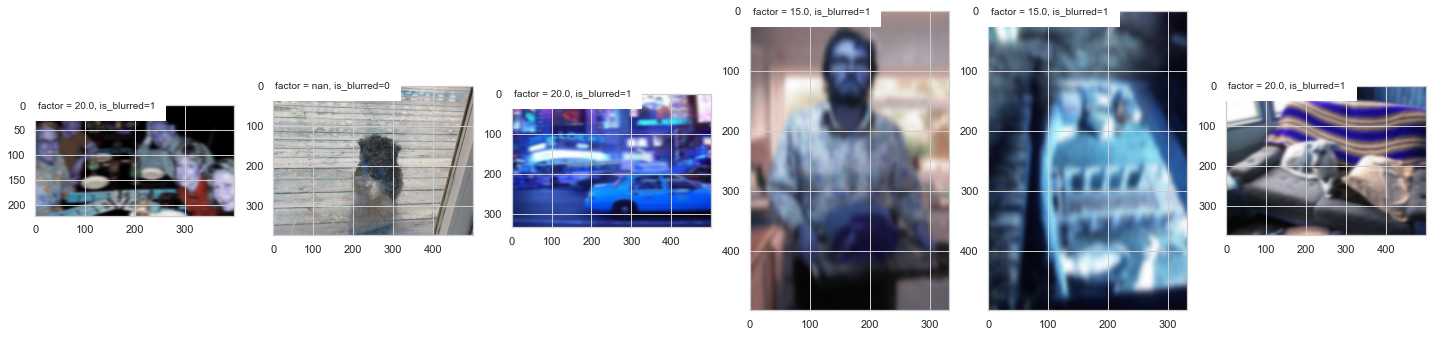

In [40]:
n_samples = 6
f, axarr = plt.subplots(1, 6, figsize=(20, 20)) 
for i, row in df_images[test_mask & (df_images['is_blurred'] != df_images['pred_is_blurred'])].sample(n_samples).reset_index(drop=True).iterrows():
    results = {'img': os.path.join(DATA_DIR, f'{row["dataset"]}/JPEGImages/{row["image_name"]}.jpg')}
    img_loader = LoadImage()
    img = img_loader(results)
    factor = row['factor']
    if not np.isnan(factor):
        img['img'] = apply_blur(img['img'], factor)
    # res = inference_detector(model, img['img'])
    # uncertainty = res[1].cpu().numpy().item()
    axarr[i].imshow(img['img'])
    axarr[i].text(5, 5, f'factor = {factor}, is_blurred={row["is_blurred"]}', bbox={'facecolor': 'white', 'pad': 10})
plt.tight_layout()

### Correctly classified images

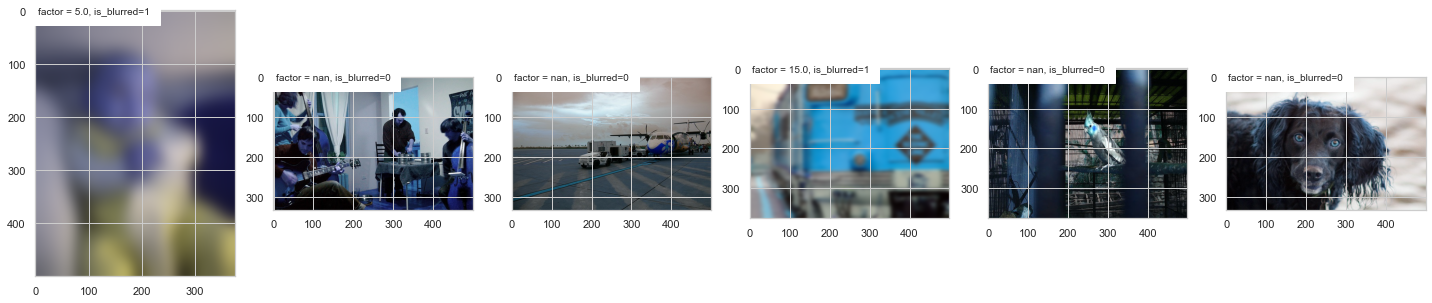

In [41]:
n_samples = 6
f, axarr = plt.subplots(1, 6, figsize=(20, 20)) 
for i, row in df_images[test_mask & (df_images['is_blurred'] == df_images['pred_is_blurred'])].sample(n_samples).reset_index(drop=True).iterrows():
    results = {'img': os.path.join(DATA_DIR, f'{row["dataset"]}/JPEGImages/{row["image_name"]}.jpg')}
    img_loader = LoadImage()
    img = img_loader(results)
    factor = row['factor']
    if not np.isnan(factor):
        img['img'] = apply_blur(img['img'], factor)
    # res = inference_detector(model, img['img'])
    # uncertainty = res[1].cpu().numpy().item()
    axarr[i].imshow(img['img'])
    axarr[i].text(5, 5, f'factor = {factor}, is_blurred={row["is_blurred"]}', bbox={'facecolor': 'white', 'pad': 10})
plt.tight_layout()